In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import clean data 
data = pd.read_csv("worldometer_data.csv")

print(data)




            Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN   

     TotalDeaths  NewDeaths

In [74]:
# Focus on Kenya, USA, India
countries_of_interest = ['Kenya', 'India', 'Australia','Japan', 'South Korea', 
             'Italy', 'Spain', 'South Africa', 'Brazil', 'Mexico', 'China', 'Russia', 'Nigeria', 'Egypt']
data_filtered = data[data['Country/Region'].isin(countries_of_interest)]
print(data_filtered)

   Country/Region          Continent    Population  TotalCases  NewCases  \
1          Brazil      South America  2.127107e+08     2917562       NaN   
2           India               Asia  1.381345e+09     2025409       NaN   
3          Russia             Europe  1.459409e+08      871894       NaN   
4    South Africa             Africa  5.938157e+07      538184       NaN   
5          Mexico      North America  1.290662e+08      462690    6590.0   
9           Spain             Europe  4.675665e+07      354530       NaN   
15          Italy             Europe  6.045257e+07      249204       NaN   
26          Egypt             Africa  1.025165e+08       95006       NaN   
45        Nigeria             Africa  2.066063e+08       45244       NaN   
48          Japan               Asia  1.264359e+08       42263       NaN   
61          Kenya             Africa  5.388116e+07       24411       NaN   
67      Australia  Australia/Oceania  2.552886e+07       19890       NaN   

    TotalDe

In [75]:
# Drop rows with missing critical values
data_filtered = data_filtered.dropna(subset=['TotalCases', 'TotalDeaths', 'Population'])
print(data_filtered)

   Country/Region          Continent    Population  TotalCases  NewCases  \
1          Brazil      South America  2.127107e+08     2917562       NaN   
2           India               Asia  1.381345e+09     2025409       NaN   
3          Russia             Europe  1.459409e+08      871894       NaN   
4    South Africa             Africa  5.938157e+07      538184       NaN   
5          Mexico      North America  1.290662e+08      462690    6590.0   
9           Spain             Europe  4.675665e+07      354530       NaN   
15          Italy             Europe  6.045257e+07      249204       NaN   
26          Egypt             Africa  1.025165e+08       95006       NaN   
45        Nigeria             Africa  2.066063e+08       45244       NaN   
48          Japan               Asia  1.264359e+08       42263       NaN   
61          Kenya             Africa  5.388116e+07       24411       NaN   
67      Australia  Australia/Oceania  2.552886e+07       19890       NaN   

    TotalDe

In [76]:
# Fill remaining missing values with 0
data_filtered = data_filtered.fillna(0)
print(data_filtered)

   Country/Region          Continent    Population  TotalCases  NewCases  \
1          Brazil      South America  2.127107e+08     2917562       0.0   
2           India               Asia  1.381345e+09     2025409       0.0   
3          Russia             Europe  1.459409e+08      871894       0.0   
4    South Africa             Africa  5.938157e+07      538184       0.0   
5          Mexico      North America  1.290662e+08      462690    6590.0   
9           Spain             Europe  4.675665e+07      354530       0.0   
15          Italy             Europe  6.045257e+07      249204       0.0   
26          Egypt             Africa  1.025165e+08       95006       0.0   
45        Nigeria             Africa  2.066063e+08       45244       0.0   
48          Japan               Asia  1.264359e+08       42263       0.0   
61          Kenya             Africa  5.388116e+07       24411       0.0   
67      Australia  Australia/Oceania  2.552886e+07       19890       0.0   

    TotalDe

In [77]:
#  Add calculated columns
data_filtered['Death Rate (%)'] = (data_filtered['TotalDeaths'] / data_filtered['TotalCases']) * 100
data_filtered['Cases per 1M'] = data_filtered['Tot Cases/1M pop']
data_filtered['Tests per 1M'] = data_filtered['Tests/1M pop']

print(data_filtered)


   Country/Region          Continent    Population  TotalCases  NewCases  \
1          Brazil      South America  2.127107e+08     2917562       0.0   
2           India               Asia  1.381345e+09     2025409       0.0   
3          Russia             Europe  1.459409e+08      871894       0.0   
4    South Africa             Africa  5.938157e+07      538184       0.0   
5          Mexico      North America  1.290662e+08      462690    6590.0   
9           Spain             Europe  4.675665e+07      354530       0.0   
15          Italy             Europe  6.045257e+07      249204       0.0   
26          Egypt             Africa  1.025165e+08       95006       0.0   
45        Nigeria             Africa  2.066063e+08       45244       0.0   
48          Japan               Asia  1.264359e+08       42263       0.0   
61          Kenya             Africa  5.388116e+07       24411       0.0   
67      Australia  Australia/Oceania  2.552886e+07       19890       0.0   

    TotalDe

In [78]:
# Reset index
data_filtered.reset_index(drop=True, inplace=True)
print(data_filtered)


   Country/Region          Continent    Population  TotalCases  NewCases  \
0          Brazil      South America  2.127107e+08     2917562       0.0   
1           India               Asia  1.381345e+09     2025409       0.0   
2          Russia             Europe  1.459409e+08      871894       0.0   
3    South Africa             Africa  5.938157e+07      538184       0.0   
4          Mexico      North America  1.290662e+08      462690    6590.0   
5           Spain             Europe  4.675665e+07      354530       0.0   
6           Italy             Europe  6.045257e+07      249204       0.0   
7           Egypt             Africa  1.025165e+08       95006       0.0   
8         Nigeria             Africa  2.066063e+08       45244       0.0   
9           Japan               Asia  1.264359e+08       42263       0.0   
10          Kenya             Africa  5.388116e+07       24411       0.0   
11      Australia  Australia/Oceania  2.552886e+07       19890       0.0   

    TotalDe

In [79]:
#  Display the cleaned data
data_filtered

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Death Rate (%),Cases per 1M,Tests per 1M
0,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,3.381042,13716.0,62085.0
1,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,2.055782,1466.0,16035.0
2,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,1.675204,5974.0,203623.0
3,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,1.784520,9063.0,53044.0
4,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,10.918109,3585.0,8189.0
5,Spain,Europe,4.675665e+07,354530,0.0,28500.0,0.0,0.0,0.0,0.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe,8.038812,7582.0,151087.0
6,Italy,Europe,6.045257e+07,249204,0.0,35187.0,0.0,201323.0,0.0,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe,14.119757,4122.0,117443.0
7,Egypt,Africa,1.025165e+08,95006,0.0,4951.0,0.0,48898.0,0.0,41157.0,41.0,927.0,48.0,135000.0,1317.0,EasternMediterranean,5.211250,927.0,1317.0
8,Nigeria,Africa,2.066063e+08,45244,0.0,930.0,0.0,32430.0,0.0,11884.0,7.0,219.0,5.0,306894.0,1485.0,Africa,2.055521,219.0,1485.0
9,Japan,Asia,1.264359e+08,42263,0.0,1026.0,0.0,28877.0,0.0,12360.0,115.0,334.0,8.0,938739.0,7425.0,WesternPacific,2.427655,334.0,7425.0


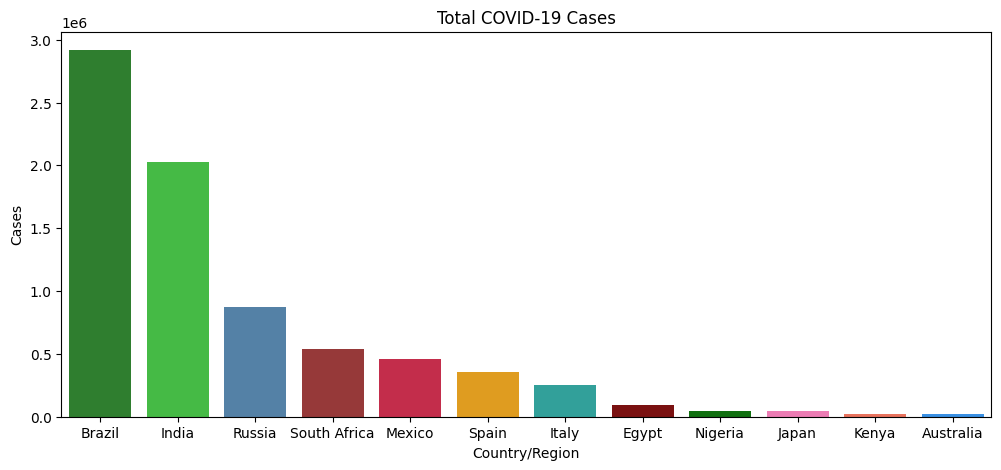

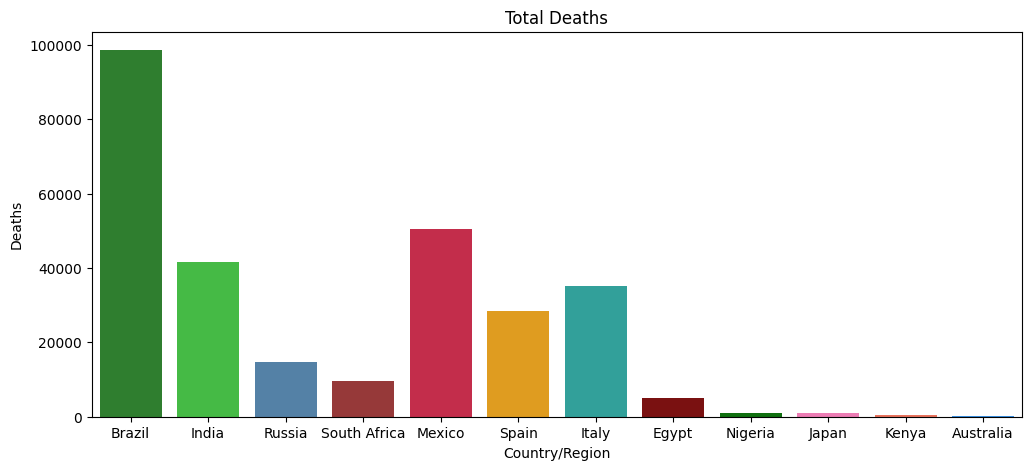

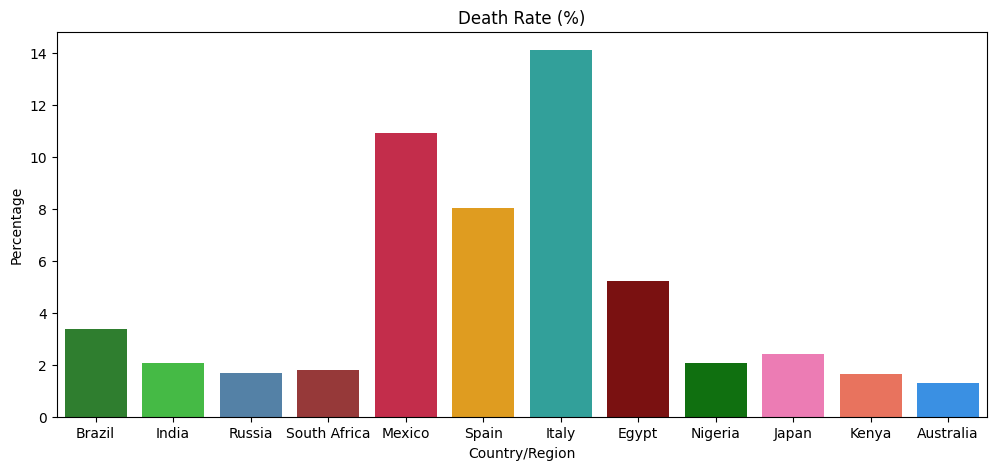

In [113]:
#  Total Cases

color_map = {
    'Kenya': '#FF6347',        # Tomato red
    'India': '#32CD32',        # Lime green
    'Australia': '#1E90FF',    # Dodger blue
    'Japan': '#FF69B4',        # Hot pink
    'South Korea': '#9370DB',  # Medium purple
    'Italy': '#20B2AA',        # Light sea green
    'Spain': '#FFA500',        # Orange
    'South Africa': '#A52A2A', # Brown
    'Brazil': '#228B22',       # Forest green
    'Mexico': '#DC143C',       # Crimson
    'China': '#FF4500',        # Orange red
    'Russia': '#4682B4',       # Steel blue
    'Nigeria': '#008000',      # Green
    'Egypt': '#8B0000'         # Dark red
}

plt.figure(figsize=(12, 5))
sns.barplot(data=data_filtered, x='Country/Region', y='TotalCases', hue='Country/Region', palette=color_map,dodge=False, legend=False   )
plt.title("Total COVID-19 Cases")
plt.ylabel("Cases")
plt.show()

#  Total Deaths
plt.figure(figsize=(12, 5))
sns.barplot(data=data_filtered, x='Country/Region', y='TotalDeaths', hue='Country/Region', palette=color_map, dodge=False, legend=False)
plt.title("Total Deaths")
plt.ylabel("Deaths")
plt.show()

#  Death Rate (%)
plt.figure(figsize=(12, 5))
sns.barplot(data=data_filtered, x='Country/Region', y='Death Rate (%)' , hue='Country/Region', palette=color_map, dodge=False, legend=False)
plt.title("Death Rate (%)")
plt.ylabel("Percentage")
plt.show()

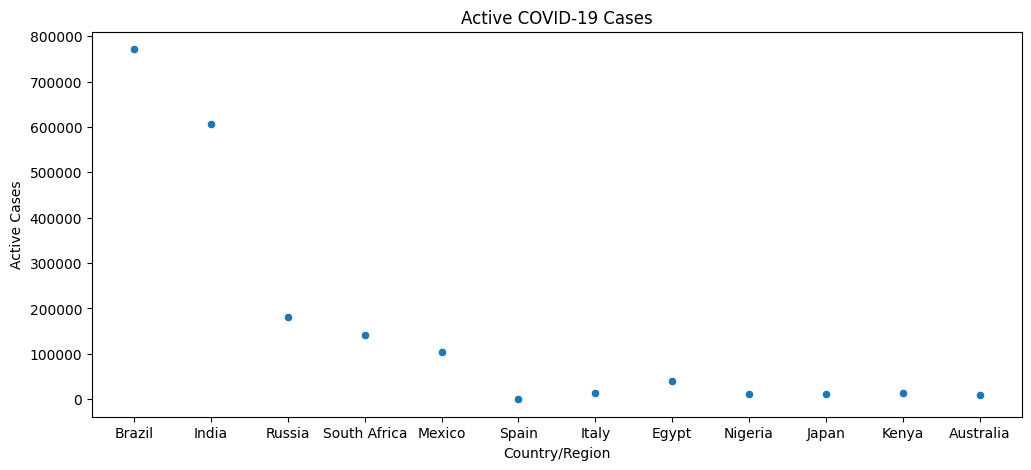

In [93]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data_filtered, x='Country/Region', y='ActiveCases')
plt.title("Active COVID-19 Cases")
plt.ylabel("Active Cases")
plt.show()